# PHY 604: Homework #1 Solutions

In [1]:
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<div style="background-color: powderblue; color: black; padding: 10px;">
1. Understanding roundoff error

(this is essentially Newman exercise 4.2) Consider a quadratic equation of the form $a x^2 + b x + c = 0$.  The two solutions of this are:                                   
  $$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$
                    
An alternate expression that gives the same two roots is:
  $$x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$
  
Understanding how roundoff error works (especially when subtracting two close numbers), and using either or both of these expressions, write a code that gives accurate roots for a quadratic equation with $a = 0.001$, $b = 1000$, and $c = 0.001$.        
</div>

We are asked to consider two different expressions for the solution quadratic equation.  Here we write functions that provide the two solutions using the two different formulations.  Note we use the `cmath` library so we can capture complex roots.

In [2]:
def quadratic1(a, b, c):
    """return the two solutions to the quadratic equation, using the
    standard expression"""

    d2 = b**2 - 4*a*c
    if d2 < 0.0:
        d = cmath.sqrt(d2)
    else:
        d = math.sqrt(d2)

    return (-b + d)/(2*a), (-b - d)/(2*a)


def quadratic2(a, b, c):
    """return the two solutions to the quadratic equation, using the
    alternate expression"""

    d2 = b**2 - 4*a*c
    if d2 < 0.0:
        d = cmath.sqrt(d2)
    else:
        d = math.sqrt(d2)

    return 2*c/(-b - d), 2*c/(-b + d)

Our test is
$$a x^2 + bx + c = 0$$
with $a = 0.001$, $b = 1000$, and $c = 0.001$.  Since $b \gg 4ac$, the discriminant, $d$, is close to $b$, so we run the risk of subtracting two numbers that are very close together.  This is a situation where roundoff can be large.

In [3]:
a = 0.001
b = 1000.0
c = 0.001

In [4]:
quadratic1(a, b, c)

(-9.999894245993346e-07, -999999.999999)

In [5]:
quadratic2(a, b, c)

(-1.000000000001e-06, -1000010.5755125057)

We would get the best result when we are add two positive numbers or subtract two negative numbers.  For this, we need to blend the results from the two methods.

In [6]:
def quad(a, b, c):
    x1, x2 = quadratic1(a, b, c)
    x1a, x2a = quadratic2(a, b, c)
    
    if b < 0:
        # b is negative, so -b is positive, therefore we prefer the '+' solution from each
        return x1, x2a
    else:
        return x2, x1a

In [7]:
quad(a, b, c)

(-999999.999999, -1.000000000001e-06)

<div style="background-color: powderblue; color: black; padding: 10px;">

2. Imagine evaluating an integral, $I$, 
$$I = \int_a^b {}f(x) dx$$
  with the trapezoid rule.  We divide $[a, b]$ into $N$ intervals and use
  the trapezoid rule as:
$$I_h \equiv \frac{h}{2} \sum_{i=0}^{N-1} \left [f(x_i) + f(x_{i+1})\right ]$$
where 
$$h = \frac{b - a}{N}$$

A we saw in class, the error in this approximation is $\mathcal{O}(h^2)$, which we write as:
$$I \approx I_h + c h^2$$ (where $c$ is some constant and $I$ is the exact integral).

Here we want to provide an estimate of the error in our integral and use this
  to pick the number of intervals $N$ to get some desired accuracy $\epsilon$.
</div>

<div style="background-color: powderblue; color: black; padding: 10px;">
a. Consider computing the integral with $N$ intervals and $2N$ intervals
      (corresponding to $h$ and $h/2$ resolution).  Show that the approximate
      error with this finer resolution is
      \begin{equation}
        \epsilon_{h/2} \approx \frac{1}{3} (I_{h/2} - I_h)
      \end{equation}
</div>

The trapezoid method approximates an integral as:
$I \approx I_h + c h^2$.  Now consider the error for 2 different stepsizes:
$$I_h = I - ch^2$$
$$I_{h/2} = I - c(h/2)^2 = I - ch^2/4$$
Subtracting these, we find:
$$ch^2 = \frac{4}{3}(I_{h/2} - I_h)$$

Our expression for the integral with stepsize $h/2$ is
$$I = I_{h/2} + ch^2/4 \equiv I_{h/2} + \epsilon_{h/2}$$
where $\epsilon_{h/2} = ch^2/4$.  Substituting in our expression for $ch^2$, we find:
$$\epsilon_{h/2} = \frac{1}{3}(I_{h/2} - I_h)$$

<div style="background-color: powderblue; color: black; padding: 10px;">
b. Test this error estimate on the following integrals with
   known solutions and see how this estimate compares to the true
   error in the trapezoid integration (i.e., $I - I_h$).  Note,
   only the absolute value of the error matters.

    <br>i. $I = \int_0^1 x dx$
    <br>ii. $I = \int_0^1 \sin(x) dx$
</div>      


Here's a general trapezoid integration rule

In [8]:
def trap(f, a, b, N):
    """ do a trapezoid integration by breaking up the domain [a,b] into N
    slabs """
    xedge = np.linspace(a, b, N+1)

    integral = 0.0

    for n in range(N):
        integral += 0.5*(xedge[n+1] - xedge[n])*(f(xedge[n]) + f(xedge[n+1]))

    return integral

Case i: $I = \int_0^1 x dx$.  The analytic solution is $1/2$.

In [9]:
def f(x):
    return x

def I_true():
    return 0.5

N = 10
I1 = trap(f, 0, 1, N)
I2 = trap(f, 0, 1, 2*N)

# our error estimate
eps = (1./3.)*(I2 - I1)
print("estimated error: {}; true error: {}".format(eps, I_true()-I2))

estimated error: 0.0; true error: 0.0


Case ii: $I = \int_0^1 \sin(x) dx$.

In [10]:
def g(x):
    return np.sin(x)

def I_true():
    return -(np.cos(1) - np.cos(0))

N = 10
I1 = trap(g, 0, 1, N)
I2 = trap(g, 0, 1, 2*N)

# our error estimate
eps = (1./3.)*(I2 - I1)
print("estimated error: {}; true error: {}".format(eps, I_true()-I2))

estimated error: 9.579031009027128e-05; true error: 9.577434361301984e-05


For case i, since that is a line, the trapezoid rule gets it exact, so the error estimate doesn't do anything.  But for case ii, we see that the error estimate is accurate.

<div style="background-color: powderblue; color: black; padding: 10px;">
Write a program that takes a function, $f$, an interval, $[a, b]$,
      and a desired error, $\epsilon$, and computes the integral of $f$
      to that accuracy by determining the number of intervals $N$ needed
      using the above error estimate.
</div>

In [11]:
def integrate(f, a, b, eps=1.e-7):

    # start small
    N = 4

    I_old = trap(f, a, b, N)
    error = 1.e30

    while error > eps:
        N *= 2
        I_new = trap(f, a, b, N)
        error = abs((1./3.)*(I_new - I_old))
        I_old = I_new

    return I_new, N

We can test this on an arbitrary function.  We'll print out how many intervals it wound up using as a measure of how demanding it was

In [12]:
def h(x):
    return np.exp(-x**2)

I_new, N = integrate(h, -10.0, 10.0, eps=1.e-2)
print(I_new, N)

1.77245385094 32


In [13]:
I_new, N = integrate(h, -10.0, 10.0, eps=1.e-7)
print(I_new, N)

1.77245385091 64


<div style="background-color: powderblue; color: black; padding: 10px;">
3. _Integration to $\infty$_ (based on Newman).  Consider the
  gamma function,
  \begin{equation}
    \Gamma(a) = \int_0^\infty x^{a-1} e^{-x} dx
  \end{equation}
  We want to evaluate this numerically.  Consider a variable 
  transformation of the form:
  \begin{equation}
    z = \frac{x}{x + c}
  \end{equation}
  This will map $x \in [0, \infty)$ to $z \in [0, 1]$, allowing us to
  do this integral numerically in terms of $z$.

  For convenience, we express the integrand as $\phi(x) = x^{a-1} e^{-x}$.  
</div>

<div style="background-color: powderblue; color: black; padding: 10px;">
a. For what value of $x$ is the integrand $\phi(x)$ maximum?
</div>

We can differntiate this and set it to 0.

$$d\phi/dx = (a-1)x^{a-2} e^{-x} - x^{a-1}e^{-x} = 0$$
or
$$(a-1)x^{-1} - 1 = 0 $$

Therefore, 
$$ x = a - 1$$


<div style="background-color: powderblue; color: black; padding: 10px;">
b. Choose the value $c$ in our transformation such that the 
    peak of the integrand occurs at $z = 1/2$---what value is $c$?

    <br><br>This choice spreads the interesting regions of integrand over
    the domain $z \in [0,1]$, making our numerical integration 
    more accurate.
</div>

Our change of variables is 
$$ z = \frac{x}{c+x}$$
or 
$$ x = c \frac{z}{1-z}$$
Taking $x = c$, we get $z = 1/2$, which is where we want the peak to fall, so this means that we want $c$ to be the value of $x$ we found above, $c = a-1$.

<div style="background-color: powderblue; color: black; padding: 10px;">
c. Find $\Gamma(a)$ for a few different value of $a$ using and
    numerical integration method you wish, integrating from $z = 0$ to
    $z = 1$.  Keep the number of points in your quadrature to a
    reasonable amount ($N \lesssim 50$).

    <br><br>Don't forget to include the factors you pick up when changing
    $dx$ to $dz$.

    <br><br>Note that roundoff error may come into play in the integrand.
    Recognizing that you can write $x^{a-1} = e^{(a-1)\ln{x}}$ can
    help minimize this.
    </div>

Note that for our change of variables,
$$dx = \frac{c dz}{(1-z)^2}$$
our integral is then:
$$\Gamma(a) = c \int_0^1 \phi \left (c \frac{z}{1-z} \right) (1-z)^{-2} dz$$

Our code is then:

In [14]:
# this is a safety factor to prevent NaNs
SMALL = 1.e-20

def integrand(x, a):
    """ we rewrite the integrand by recognizing that x**(a-1) =
       exp((a-1.0)*log(x)) """

    # if x = 0, then the integrand is 0
    return np.where(x > 0.0,
                    np.exp( (a-1.0)*np.log(x) - x), 0.0)

def zv(x, a):
    """ transform the variable x -> z """
    c = a - 1.0
    return x/(c + x) 

def xv(z, a):
    """ transform back from z -> x """
    c = a - 1.0
    return c*z/(1.0 - z + SMALL)

def gamma_integral(a, npts):
    """ integrate the gamma function """
    
    z = np.linspace(0.0, 1.0, npts)

    # do the integral via the trapezoid rule.  We will integrate
    # over z = [0, 1].  Our integral, with our change of coords
    # is 
    #
    # I = c int_0^1 f( (z/(1-z)) ) dz/(1-z)^2
    
    I = 0.0
    f = integrand(xv(z, a), a)
    c = a - 1.0

    for n in range(1, npts):
        I += 0.5*(z[n] - z[n-1])*(f[n]/(1.0 - z[n] + SMALL)**2 + 
                                  f[n-1]/(1.0 - z[n-1] + SMALL)**2)
    I *= c

    return I

a = 1.5
N = 20
I = gamma_integral(a, N)
print(I)

0.884707375364


/home/zingale/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


<div style="background-color: powderblue; color: black; padding: 10px;">
4. _Simpson's rule_ . In class we derived the compound version
  of Simpson's rule, noting that we integrate over pairs of
  slabs/intervals.

<br><br>a. Imagine that you want to integrate $f(x)$ over $[a, b]$, and
    have divided the domain into an odd number, $N$, slabs/intervals,
    with the function specified at the points $x_0, \ldots, x_{N}$.

    In this case, you would integrate all the pairs of slabs up until
    the last slab.  For the remaining odd slab, $[x_{N-1}, x_{N}]$,
    show that a Simpson's rule for this slab is
    \begin{equation}
      \int_{x_{N-1}}^{x_{N}} f(x) dx \approx \frac{\Delta x}{12}
      (-f_{N-2} + 8 f_{N-1} + 5 f_{N})
    \end{equation}
    (Hint: fit a parabola to the last three points and integrate over
    the last slab).  
</div>

We want to fit a parabola to the rightmost three points, $x_{N-2}$, $x_{N-1}$, and $x_N$.

We'll take our parabola to be:
$$f(x) = A (x - x_N)^2 + B (x - x_N) + C$$

Using our known function values, we find:
$$f_{N-2} = 4\delta^2 A - 2\delta B + C$$
$$f_{N-1} = \delta^2 A - \delta B + C$$
$$f_N = C$$
where $\delta = x_N - x_{N-1}$.

This gives 3 equations and 3 unknowns.  The solution to these are:
$$A = \frac{f_{N-2} - 2 f_{N-1} + f_N}{2\delta^2}$$
$$B = -\frac{-f_{N-2} + 4f_{N-1} - 3f_N}{2\delta}$$
$$C = f_N$$

Now we integrate only over _one slab_, as:
$$I = \int_{x_{N-1}}^{x_N} [ A(x-x_N)^2 + B(x-x_N) + C ] dx = \frac{1}{3}\delta^3 A - \frac{1}{2}\delta^2 B + C\delta$$

Substituting in our expressions for $A$, $B$, and $C$, we get:
$$I = \frac{\delta}{12}
      (-f_{N-2} + 8 f_{N-1} + 5 f_{N})$$

<div style="background-color: powderblue; color: black; padding: 10px;">

b. Integrate $f(x) = \sin(\pi x)$ over $[0,1]$ using $N = 3$,
    $7$, $15$, \& $31$ slabs/intervals, and plot the absolute error
    vs. $\delta = (b-a)/N$ on a log-log plot.  

    <br>What convergence rate do you observe?
</div>

First we define the function we wish to integrate and the exact solution

In [15]:
# function we wish to integrate
def fun(x):
    return np.sin(math.pi*x)


# analytic value of the integral of fun() above
def I_exact(a,b):
    return (1.0/math.pi)*(-math.cos(math.pi*b) + math.cos(math.pi*a))

Now we write our Simpson's routine:

In [16]:
def simp(a, b, f, N):
    """ integrate using Simpson's rule """

    xedge = np.linspace(a, b, N+1)

    integral = 0.0

    if N%2 == 0:
        M = N
        odd = 0
    else:
        M = N - 1
        odd = 1

    delta = (xedge[1] - xedge[0])

    for n in range(0, M, 2):
        integral += (1.0/3.0)*delta*(f(xedge[n]) +
                                     4.0*f(xedge[n+1]) +
                                     f(xedge[n+2]))

    # if we had an odd # of bins, do the last one:
    if odd:
        integral += (delta/12.0)*(-f(xedge[N-2]) +
                                   8.0*f(xedge[N-1]) +
                                   5.0*f(xedge[N]))

    return integral

We'll run at a variety of $N$ and look at convergence

0.3333333333333333 0.649519052838 0.0128992804707
0.14285714285714285 0.637251651005 0.00063187863742
0.06666666666666667 0.636651575394 3.18030261199e-05
0.03225806451612903 0.636621537608 1.76523993489e-06


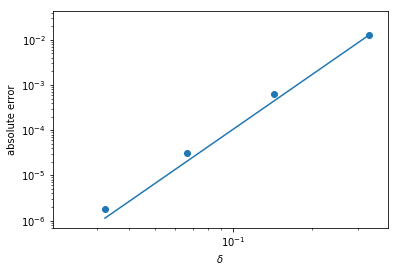

In [17]:
a = 0.0
b = 1.0

N = [3, 7, 15, 31]

delta = []
error = []

for n in N:
    t = simp(a,b,fun,n)
    e = t - I_exact(a,b)
    dx = (b - a)/n

    print(dx, t, e)

    # for plotting
    delta.append(dx)
    error.append(e)


d = np.array(delta)
e = np.array(error)
plt.scatter(d, e)

# plot a line representing delta**4 scaling
plt.plot(d, e[0]*(d/d[0])**4)

ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.xlabel(r"$\delta$")
plt.ylabel("absolute error")

The line represents 4th order scaling.  We seem to converge almost as 4th order overall.